# Import necessary libraries


In [3]:
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation

pd.set_option("display.max_columns", None)  # Display all columns in Pandas DataFrames

# Import statistical and machine learning libraries
from scipy import stats  # SciPy for scientific and statistical functions

# Import data visualization libraries
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for enhanced data visualization
import plotly.express as px  # Plotly Express for interactive visualizations

# Import preprocessing tools
from sklearn.preprocessing import LabelEncoder  # LabelEncoder for encoding categorical variables

# Model Selection
from sklearn.model_selection import KFold

# Import machine learning models
from sklearn.experimental import enable_hist_gradient_boosting # Enable Histogram-Based Gradient Boosting
from sklearn.ensemble import (
    HistGradientBoostingClassifier,  # Histogram-Based Gradient Boosting Classifier
    GradientBoostingClassifier,  # Gradient Boosting Classifier
    AdaBoostClassifier,  # AdaBoost Classifier
    RandomForestClassifier,  # Random Forest Classifier
    ExtraTreesClassifier,  # Extra Trees Classifier
    VotingClassifier,  # Ensemble Voting Classifier
    StackingClassifier,  # Stacking Classifier
)
from xgboost import XGBClassifier  # XGBoost Classifier
from lightgbm import LGBMClassifier # lightgbm Classifier

# Import evaluation metrics
from sklearn.metrics import f1_score  # F1-score for model evaluation

# Suppress warnings to improve code readability
import warnings

warnings.filterwarnings("ignore")

# Loading and Preparing Data

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
origin = pd.read_csv('data/horse.csv')

# Add a new column 'is_generated' to the 'train' DataFrame and set all values to 1
train["is_generated"] = 1

# Add a new column 'is_generated' to the 'test' DataFrame and set all values to 1
test["is_generated"] = 1

# Add a new column 'is_generated' to the 'origin' DataFrame and set all values to 0
origin["is_generated"] = 0

# Drop the 'id' column from the 'train' DataFrame
train.drop('id', axis=1, inplace=True)

# Drop the 'id' column from the 'test' DataFrame
test.drop('id', axis=1, inplace=True)

# Concatenate the 'train' and 'origin' DataFrames along rows, ignoring index, and store the result in 'train_total'
train_total = pd.concat([train, origin], ignore_index=True)

# Remove duplicate rows from the 'train_total' DataFrame, if any
train_total.drop_duplicates(inplace=True)

# Concatenate the 'train_total' and 'test' DataFrames along rows, ignoring index, and store the result in 'total'
total = pd.concat([train_total, test], ignore_index=True)

# Print the shapes of the three DataFrames: 'train', 'test', and 'total'
print('The shape of the train data:', train.shape)
print('The shape of the test data:', test.shape)
print('The shape of the total data:', total.shape)


The shape of the train data: (1235, 29)
The shape of the test data: (824, 28)
The shape of the total data: (2358, 29)


In [5]:
train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,is_generated
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died,1
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized,1
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived,1
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived,1
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,2.0,NaN,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived,1
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,decreased,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died,1
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,increased,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived,1
1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,2.0,absent,distend_small,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived,1


In [6]:
test

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,is_generated
0,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,none,none,7.0,normal,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no,1
1,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,moderate,slight,none,3.5,decreased,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes,1
2,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,normal,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes,1
3,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,depressed,absent,severe,slight,more_1_liter,2.0,absent,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no,1
4,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,less_3_sec,mild_pain,absent,slight,slight,none,3.0,decreased,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,NaN,none,7.0,normal,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes,1
820,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,moderate,slight,more_1_liter,2.0,absent,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no,1
821,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,6.5,decreased,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no,1
822,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,7.0,normal,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes,1


In [7]:
total

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,is_generated
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died,1
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized,1
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived,1
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived,1
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,NaN,none,7.0,normal,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes,NaN,1
2354,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,moderate,slight,more_1_liter,2.0,absent,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no,NaN,1
2355,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,6.5,decreased,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no,NaN,1
2356,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,7.0,normal,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes,NaN,1


# Preprocessing and Feature Selection

In [8]:
# Create a list 'num_var' that contains column names from 'train' where the number of unique values is greater than 10
num_var = [column for column in train.columns if train[column].nunique() > 10]

# Create a list 'bin_var' that contains column names from 'train' where the number of unique values is exactly 2 (binary variables)
bin_var = [column for column in train.columns if train[column].nunique() == 2]

# Create a list 'cat_var' that contains specific categorical column names from 'train'
cat_var = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
           'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
           'abdomen', 'abdomo_appearance', 'lesion_2', 'surgery', 'age', 'surgical_lesion', 'lesion_3', 'cp_data']

# Define the target variable, which is 'outcome'
target = 'outcome'

print(bin_var)

['surgery', 'age', 'surgical_lesion', 'lesion_3', 'cp_data']


# Target Labels: Mapping to Numerical Values

In [9]:
total[target] = total[target].map({'died':0,'euthanized':1,'lived':2})

total

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,is_generated
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,0.0,1
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,1.0,1
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,2.0,1
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,2.0,1
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,NaN,none,7.0,normal,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes,NaN,1
2354,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,moderate,slight,more_1_liter,2.0,absent,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no,NaN,1
2355,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,6.5,decreased,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no,NaN,1
2356,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,7.0,normal,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes,NaN,1


# category columns: Label Encoding & One-Hot Encoding 

In [10]:
def preprocessing(df, le_cols, ohe_cols):
    
    # Label Encoding for binary cols
    le = LabelEncoder()    
    for col in le_cols:
        df[col] = le.fit_transform(df[col])
    
    # OneHot Encoding for category cols (one-vs-rest)
    df = pd.get_dummies(df, columns = ohe_cols)
    
    # data cleaning
    df["pain"] = df["pain"].replace('slight', 'moderate')
    df["peristalsis"] = df["peristalsis"].replace('distend_small', 'normal')
    df["rectal_exam_feces"] = df["rectal_exam_feces"].replace('serosanguious', 'absent')
    df["nasogastric_reflux"] = df["nasogastric_reflux"].replace('slight', 'none')
    
    # ordinal categorical columns, and fill up empty values
    df["temp_of_extremities"] = df["temp_of_extremities"].fillna("normal").map({'cold': 0, 'cool': 1, 'normal': 2, 'warm': 3})
    df["peripheral_pulse"] = df["peripheral_pulse"].fillna("normal").map({'absent': 0, 'reduced': 1, 'normal': 2, 'increased': 3})
    df["capillary_refill_time"] = df["capillary_refill_time"].fillna("3").map({'less_3_sec': 0, '3': 1, 'more_3_sec': 2})
    df["pain"] = df["pain"].fillna("depressed").map({'alert': 0, 'depressed': 1, 'moderate': 2, 'mild_pain': 3, 'severe_pain': 4, 'extreme_pain': 5})
    df["peristalsis"] = df["peristalsis"].fillna("hypomotile").map({'hypermotile': 0, 'normal': 1, 'hypomotile': 2, 'absent': 3})
    df["abdominal_distention"] = df["abdominal_distention"].fillna("none").map({'none': 0, 'slight': 1, 'moderate': 2, 'severe': 3})
    df["nasogastric_tube"] = df["nasogastric_tube"].fillna("none").map({'none': 0, 'slight': 1, 'significant': 2})
    df["nasogastric_reflux"] = df["nasogastric_reflux"].fillna("none").map({'less_1_liter': 0, 'none': 1, 'more_1_liter': 2})
    df["rectal_exam_feces"] = df["rectal_exam_feces"].fillna("absent").map({'absent': 0, 'decreased': 1, 'normal': 2, 'increased': 3})
    df["abdomen"] = df["abdomen"].fillna("distend_small").map({'normal': 0, 'other': 1, 'firm': 2,'distend_small': 3, 'distend_large': 4})
    df["abdomo_appearance"] = df["abdomo_appearance"].fillna("serosanguious").map({'clear': 0, 'cloudy': 1, 'serosanguious': 2})

    return df    



# one-hot encoding: only mucous_membrane should be one vs rest
# binary: ['surgery', 'age', 'surgical_lesion', 'lesion_3', 'cp_data'], 
#           remove 'lession_3', but 'lesion_3' does not have a significant relationship with the target variable.

total = preprocessing(total, le_cols = ["surgery", "age", "surgical_lesion", "cp_data"], ohe_cols = ["mucous_membrane"])
total

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,is_generated,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink
0,1,0,530001,38.1,132.0,24.0,1,1,2,1,3,1,1,0,6.5,1,3,57.0,8.5,2,3.4,1,2209,0,0,0,0.0,1,False,False,True,False,False,False
1,1,0,533836,37.5,88.0,12.0,1,2,2,3,3,2,0,2,2.0,0,3,33.0,64.0,2,2.0,1,2208,0,0,0,1.0,1,False,False,False,False,True,False
2,1,0,529812,38.3,120.0,28.0,1,1,0,5,2,2,1,1,3.5,0,4,37.0,6.4,2,3.4,1,5124,0,0,0,2.0,1,False,False,False,False,False,True
3,1,0,5262541,37.1,72.0,30.0,0,1,2,3,2,2,1,2,2.0,1,3,53.0,7.0,1,3.9,1,2208,0,0,1,2.0,1,False,False,False,False,False,True
4,0,0,5299629,38.0,52.0,48.0,2,2,0,0,2,0,1,0,7.0,2,0,47.0,7.3,1,2.6,0,0,0,0,1,2.0,1,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,0,0,529461,40.3,114.0,36.0,1,1,2,1,2,2,0,1,7.0,2,4,57.0,8.1,2,4.5,1,3205,0,0,1,NaN,1,False,False,False,True,False,False
2354,1,0,535338,37.2,100.0,20.0,1,1,2,5,3,2,1,2,2.0,0,3,50.0,66.0,2,2.0,1,2209,0,0,0,NaN,1,False,False,False,False,True,False
2355,1,0,529640,39.2,132.0,12.0,1,1,2,1,2,2,1,2,6.5,1,3,53.0,7.6,2,4.5,1,2205,0,0,0,NaN,1,False,False,True,False,False,False
2356,0,0,5287179,38.3,54.0,66.0,2,2,0,3,2,0,1,1,7.0,2,3,49.0,8.6,0,5.0,0,3111,0,0,1,NaN,1,False,False,False,True,False,False


# Missing Value Imputation


In [11]:
def features_engineering(df):
    
    data_preprocessed = df.copy()
    
    # Imputer 
    cols_with_nan = df.drop(target,axis=1).columns[df.drop(target,axis=1).isna().any()].tolist()

    for feature in cols_with_nan:
        data_preprocessed[feature].fillna(data_preprocessed[feature].mode()[0], inplace=True)
    
    return data_preprocessed

total = features_engineering(total)
total

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,is_generated,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink
0,1,0,530001,38.1,132.0,24.0,1,1,2,1,3,1,1,0,6.5,1,3,57.0,8.5,2,3.4,1,2209,0,0,0,0.0,1,False,False,True,False,False,False
1,1,0,533836,37.5,88.0,12.0,1,2,2,3,3,2,0,2,2.0,0,3,33.0,64.0,2,2.0,1,2208,0,0,0,1.0,1,False,False,False,False,True,False
2,1,0,529812,38.3,120.0,28.0,1,1,0,5,2,2,1,1,3.5,0,4,37.0,6.4,2,3.4,1,5124,0,0,0,2.0,1,False,False,False,False,False,True
3,1,0,5262541,37.1,72.0,30.0,0,1,2,3,2,2,1,2,2.0,1,3,53.0,7.0,1,3.9,1,2208,0,0,1,2.0,1,False,False,False,False,False,True
4,0,0,5299629,38.0,52.0,48.0,2,2,0,0,2,0,1,0,7.0,2,0,47.0,7.3,1,2.6,0,0,0,0,1,2.0,1,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,0,0,529461,40.3,114.0,36.0,1,1,2,1,2,2,0,1,7.0,2,4,57.0,8.1,2,4.5,1,3205,0,0,1,NaN,1,False,False,False,True,False,False
2354,1,0,535338,37.2,100.0,20.0,1,1,2,5,3,2,1,2,2.0,0,3,50.0,66.0,2,2.0,1,2209,0,0,0,NaN,1,False,False,False,False,True,False
2355,1,0,529640,39.2,132.0,12.0,1,1,2,1,2,2,1,2,6.5,1,3,53.0,7.6,2,4.5,1,2205,0,0,0,NaN,1,False,False,True,False,False,False
2356,0,0,5287179,38.3,54.0,66.0,2,2,0,3,2,0,1,1,7.0,2,3,49.0,8.6,0,5.0,0,3111,0,0,1,NaN,1,False,False,False,True,False,False


In [12]:
# split train test set from dataframe total
df_train = total[total[target].notna()]

df_test = total[total[target].isna()]
df_test.drop(target,axis=1,inplace=True)

In [13]:
# list of all features
full_features = df_test.columns.tolist()

# list of binary features
bin_features = df_test.select_dtypes('bool').columns

# convert binary features from boolean to int
df_train[bin_features] = df_train[bin_features].astype('int64')
df_test[bin_features] = df_test[bin_features].astype('int64')

df_train

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,is_generated,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink
0,1,0,530001,38.1,132.0,24.0,1,1,2,1,3,1,1,0,6.5,1,3,57.0,8.5,2,3.4,1,2209,0,0,0,0.0,1,0,0,1,0,0,0
1,1,0,533836,37.5,88.0,12.0,1,2,2,3,3,2,0,2,2.0,0,3,33.0,64.0,2,2.0,1,2208,0,0,0,1.0,1,0,0,0,0,1,0
2,1,0,529812,38.3,120.0,28.0,1,1,0,5,2,2,1,1,3.5,0,4,37.0,6.4,2,3.4,1,5124,0,0,0,2.0,1,0,0,0,0,0,1
3,1,0,5262541,37.1,72.0,30.0,0,1,2,3,2,2,1,2,2.0,1,3,53.0,7.0,1,3.9,1,2208,0,0,1,2.0,1,0,0,0,0,0,1
4,0,0,5299629,38.0,52.0,48.0,2,2,0,0,2,0,1,0,7.0,2,0,47.0,7.3,1,2.6,0,0,0,0,1,2.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1,0,533886,38.0,120.0,70.0,0,2,2,1,3,0,0,1,2.0,0,4,55.0,65.0,2,2.0,0,3205,0,0,0,1.0,0,0,0,0,0,1,0
1530,0,0,527702,37.2,72.0,24.0,1,3,2,4,2,2,2,1,2.0,0,3,44.0,7.5,2,3.3,1,2208,0,0,1,1.0,0,0,0,0,0,1,0
1531,1,0,529386,37.5,72.0,30.0,0,1,0,4,3,2,1,1,2.0,1,4,60.0,6.8,2,2.0,1,3205,0,0,0,0.0,0,0,0,0,0,1,0
1532,1,0,530612,36.5,100.0,24.0,1,1,0,3,2,2,2,1,2.0,0,3,50.0,6.0,2,3.4,1,2208,0,0,1,2.0,0,0,0,0,0,0,1


# F1 Score Calculation Function

In [14]:
def caculate_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average = 'micro')

# Baseline Model and Feature Selection Evaluation

In [15]:
# baseline model
lgbm_baseline = LGBMClassifier(n_estimators=80,
                     max_depth=4,
                     random_state=42)

In [16]:
# save the f1 score in df f1_results corresponding to selected_features
f1_results = pd.DataFrame(columns=['Selected_Features', 'F1'])

# evaluation on feature selection
def evaluation(df, select_features, note):
    global f1_results
    
    X = df[select_features]
    Y = df[target]
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        lgbm_baseline.fit(X_train, y_train)
        y_hat = lgbm_baseline.predict(X_test) 
        f1 = caculate_f1(y_test, y_hat)
        f1_scores.append(f1)
    
    average_f1 = np.mean(f1_scores)
    new_row = {'Selected_Features': note, 'F1': average_f1}
    f1_results = pd.concat([f1_results, pd.DataFrame([new_row])], ignore_index=True)

    print('====================================')
    print(note)
    print("Average F1:", average_f1)
    print('====================================')
    return average_f1

# evaluation the selected features
evaluation(df=df_train,select_features=full_features,note='Baseline')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 1227, number of used features: 31
[LightGBM] [Info] Start training from score -1.146181
[LightGBM] [Info] Start training from score -1.631689
[LightGBM] [Info] Start training from score -0.720410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

0.7307530178195056

# Addressing Multicollinearity with Correlation

In [17]:
# find those features that have high correlation with multicollinearity issue
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: 
                colname = corr_matrix.columns[i]                  
                col_corr.add(colname)
    return col_corr      

corr_features = correlation(df_train, 0.35)
corr_features

{'abdominal_distention',
 'abdomo_protein',
 'capillary_refill_time',
 'cp_data',
 'is_generated',
 'lesion_3',
 'mucous_membrane_normal_pink',
 'packed_cell_volume',
 'peripheral_pulse',
 'peristalsis',
 'rectal_exam_feces',
 'respiratory_rate',
 'surgical_lesion',
 'temp_of_extremities',
 'total_protein'}

In [18]:
# all columns drop the highly correlated features
less_corr_features = df_test.drop(['abdominal_distention',
 'abdomo_protein',
 'capillary_refill_time',
 'cp_data',
 'lesion_3',
 'mucous_membrane_dark_cyanotic',
 'mucous_membrane_normal_pink',
 'packed_cell_volume',
 'peripheral_pulse',
 'peristalsis',
 'rectal_exam_feces',
 'respiratory_rate',
 'surgical_lesion',
 'temp_of_extremities',
 'total_protein'],axis=1).columns.tolist()

less_corr_features

['surgery',
 'age',
 'hospital_number',
 'rectal_temp',
 'pulse',
 'pain',
 'nasogastric_tube',
 'nasogastric_reflux',
 'nasogastric_reflux_ph',
 'abdomen',
 'abdomo_appearance',
 'lesion_1',
 'lesion_2',
 'is_generated',
 'mucous_membrane_bright_pink',
 'mucous_membrane_bright_red',
 'mucous_membrane_pale_cyanotic',
 'mucous_membrane_pale_pink']

In [19]:
# evaluation feature selection with corr_features
evaluation(df=df_train,select_features=less_corr_features,note='Corr Features')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 1227, number of used features: 17
[LightGBM] [Info] Start training from score -1.146181
[LightGBM] [Info] Start training from score -1.631689
[LightGBM] [Info] Start training from score -0.720410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

0.737299610397905

# Features Importance

In [20]:
# evaluation feature importances
def f_importance_plot(f_imp):
    fig = plt.figure(figsize=(12, 0.20*len(f_imp)))
    plt.title(f'Feature importances', size=16, y=1.05, 
              fontweight='bold')
    a = sns.barplot(data=f_imp, x='imp', y='feature', linestyle="-", 
                    linewidth=0.5, edgecolor="black",palette='YlOrBr_r')
    plt.xlabel('')
    plt.xticks([])
    plt.ylabel('')
    plt.yticks(size=11)
    
    for j in ['right', 'top', 'bottom']:
        a.spines[j].set_visible(False)
    for j in ['left']:
        a.spines[j].set_linewidth(0.5)
    plt.tight_layout()
    plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 1534, number of used features: 31
[LightGBM] [Info] Start training from score -1.147370
[LightGBM] [Info] Start training from score -1.648659
[LightGBM] [Info] Start training from score -0.712898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

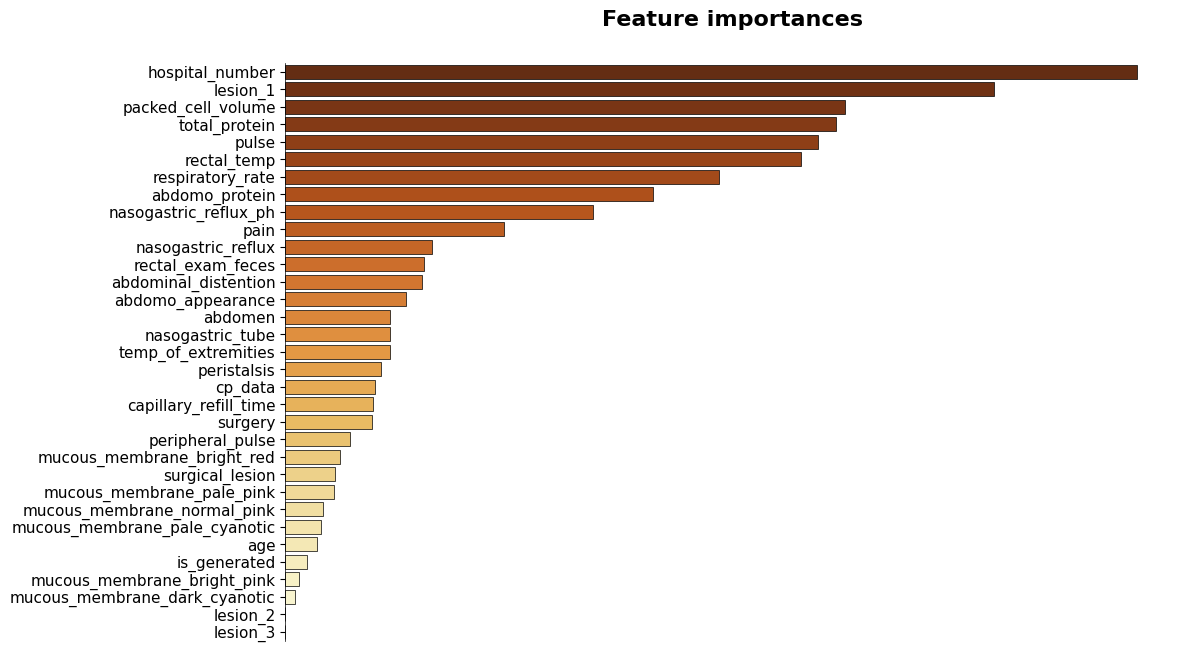

In [21]:
# baseline classifier
clf = LGBMClassifier(n_estimators=1000,
                     max_depth=10,
                     random_state=42)

# fit training set 
clf.fit(df_train.drop(target,axis=1), df_train[target])

# save feature importances in a dataframe
f_imp_df = pd.DataFrame({'feature': df_train.drop(target,axis=1).columns, 'imp': clf.feature_importances_})
f_imp_df.sort_values(by='imp',ascending=False,inplace=True)

f_importance_plot(f_imp_df)

Select the first 30 important features.

In [22]:
best_feature_num = 30
#best_score = 0.7392406127690802
best_score = 0.737299610397905
print(f'Best feature number is Top {best_feature_num}, Best score is {best_score}')

Best feature number is Top 30, Best score is 0.737299610397905


# Top 30 features deliver the best performance in cross-validation.

In [23]:
best_features = f_imp_df.head(best_feature_num).feature.to_list()

best_features

['hospital_number',
 'lesion_1',
 'packed_cell_volume',
 'total_protein',
 'pulse',
 'rectal_temp',
 'respiratory_rate',
 'abdomo_protein',
 'nasogastric_reflux_ph',
 'pain',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdominal_distention',
 'abdomo_appearance',
 'abdomen',
 'nasogastric_tube',
 'temp_of_extremities',
 'peristalsis',
 'cp_data',
 'capillary_refill_time',
 'surgery',
 'peripheral_pulse',
 'mucous_membrane_bright_red',
 'surgical_lesion',
 'mucous_membrane_pale_pink',
 'mucous_membrane_normal_pink',
 'mucous_membrane_pale_cyanotic',
 'age',
 'is_generated',
 'mucous_membrane_bright_pink']

# Selecting Best Features for Modeling

In [24]:
# X and y of train set
X = df_train[best_features]
y = df_train[target]

# X_test with only best features
df_test_best_features = df_test[best_features]

X

,hospital_number,lesion_1,packed_cell_volume,total_protein,pulse,rectal_temp,respiratory_rate,abdomo_protein,nasogastric_reflux_ph,pain,nasogastric_reflux,rectal_exam_feces,abdominal_distention,abdomo_appearance,abdomen,nasogastric_tube,temp_of_extremities,peristalsis,cp_data,capillary_refill_time,surgery,peripheral_pulse,mucous_membrane_bright_red,surgical_lesion,mucous_membrane_pale_pink,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,age,is_generated,mucous_membrane_bright_pink
0,530001,2209,57.0,8.5,132.0,38.1,24.0,3.4,6.5,1,0,1,1,2,3,1,1,3,0,2,1,1,0,1,0,0,0,0,1,0
1,533836,2208,33.0,64.0,88.0,37.5,12.0,2.0,2.0,3,2,0,2,2,3,0,1,3,0,2,1,2,0,1,0,0,1,0,1,0
2,529812,5124,37.0,6.4,120.0,38.3,28.0,3.4,3.5,5,1,0,2,2,4,1,1,2,0,0,1,1,0,1,1,0,0,0,1,0
3,5262541,2208,53.0,7.0,72.0,37.1,30.0,3.9,2.0,3,2,1,2,1,3,1,0,2,1,2,1,1,0,1,1,0,0,0,1,0
4,5299629,0,47.0,7.3,52.0,38.0,48.0,2.6,7.0,0,0,2,0,1,0,1,2,2,1,0,0,2,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,533886,3205,55.0,65.0,120.0,38.0,70.0,2.0,2.0,1,1,0,0,2,4,0,0,3,0,2,1,2,0,0,0,0,1,0,0,0
1530,527702,2208,44.0,7.5,72.0,37.2,24.0,3.3,2.0,4,1,0,2,2,3,2,1,2,1,2,0,3,0,1,0,0,1,0,0,0
1531,529386,3205,60.0,6.8,72.0,37.5,30.0,2.0,2.0,4,1,1,2,2,4,1,0,3,0,0,1,1,0,1,0,0,1,0,0,0
1532,530612,2208,50.0,6.0,100.0,36.5,24.0,3.4,2.0,3,1,0,2,2,3,2,1,2,1,0,1,1,0,1,1,0,0,0,0,0


best features:

['hospital_number',
 'lesion_1',
 'packed_cell_volume',
 'total_protein',
 'pulse',
 'rectal_temp',
 'respiratory_rate',
 'abdomo_protein',
 'nasogastric_reflux_ph',
 'pain',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdominal_distention',
 'abdomo_appearance',
 'abdomen',
 'nasogastric_tube',
 'temp_of_extremities',
 'peristalsis',
 'cp_data',
 'capillary_refill_time',
 'surgery',
 'peripheral_pulse',
 'mucous_membrane_bright_red',
 'surgical_lesion',
 'mucous_membrane_pale_pink',
 'mucous_membrane_normal_pink',
 'mucous_membrane_pale_cyanotic',
 'age',
 'is_generated',
 'mucous_membrane_bright_pink']